# KC House Price Prediction

## Objective
Imagine 2 scenarios:
1. I own a house and I want to sell it. A house is a big investment for nearly everybody so I need to make sure that I only accept the offers which are actually close to my house's worth. I cannot be sure about the deal until I know my house's worth.
2. I am looking for a house to buy. If I am planning on buying a house, I am either looking for a house which fits my budget and has the features I want or I know the specefic house. Either way, I need to know the worth of the house I am looking for. If I don't the value of the house I want to buy, there's a good chance that I will end up buying the property for a higher rate than its worth.

To solve both the scenarios, I thought that it would be an amazing feat if I could predict the house price using its features. Knowing the worth of a house using its features not only helps the buyers, it helps the sellers as well.

With this inspiration, I tried to predict the house prices in King County, Washington State, USA. I got the dataset from kaggle which contains the price of houses with its features.

## EDA and Anamoly Detection

The dataset I am going to use in this project is obtained from kaggle. This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It contains 21613 entries and 21 variables. The features which are available in the dataset are:
- 'id': Unique ID for the house.
- 'date': Date of sale.
- 'price': Price at which the house was sold.
- 'bedrooms': No of bedrooms in the house.
- 'bathrooms': No of bathrooms in the house.
- 'sqft_living': Total area of the house.
- 'sqft_lot': Total area of the lot.
- 'floors': No of floors of the house.
- 'waterfront': Whether the house has a waterfront or not.
- 'view': An index from 0 to 4 of how good the view of the property was
- 'condition': An index from 1 to 5 of the condition of the property.
- 'grade': An index from 1 to 13 which represents the construction quality of the house and its design.
- 'sqft_above': Square footage of the interior housing space above ground.
- 'sqft_basement': Square footage of the interior housing space below ground.
- 'yr_built': Year in which the house was built.
- 'yr_renovated': Year in which the house was renovated last.
- 'zipcode': Zipcode of the area.
- 'lat': Latitude.
- 'long': Longitude.
- 'sqft_living15': The average house square footage of the 15 closest houses.
- 'sqft_lot15': The square footage of the land lots of the nearest 15 neighbors.

I will start the EDA by getting a gist of the data using pd.describe() and move on to univariate and bivariate analysis. I will keep fixing the anamolies as we keep finding it.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

#### Loading Data

In [2]:
import os
os.chdir("C:\\Users\\Shivam\\Downloads")
house_train_data = pd.read_csv('wk3_kc_house_train_data.csv')
house_test_data = pd.read_csv('wk3_kc_house_test_data.csv')
house_valid_data = pd.read_csv('wk3_kc_house_valid_data.csv')

#### Exploratory Data Analysis
We have loaded the data which was split into 3 parts. I will be using the training dataset for exploration. We do not use other parts of the dataset as we want to simulate the real world scenario when we deploy the model. We do not want to expose ourselves to the data present in test data in EDA as we do not want it to effect our model in any way.

In [3]:
house_train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


We will try to find duplicate rows. As ID is the unique identifier of every house in this dataset, let us check if there are any duplicates in 'id' column.

In [4]:
len(house_train_data.id) - len(house_train_data.id.unique())

41

As we can see in the above results, there are 41 duplicate ids in the dataset but as we can observe below, these rows are not actually duplicates as the prices and dates are different. This might have occured if the same house was sold multiple times during the period when this dataset was created.

In [5]:
house_train_data[house_train_data.duplicated(subset='id', keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
43,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
44,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
165,2231500030,20141001T000000,315000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
166,2231500030,20150324T000000,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
384,8682262400,20140718T000000,430000.0,2,1.75,1350,4003,1.0,0,0,...,8,1350,0,2004,0,98053,47.7176,-122.033,1350,4479
385,8682262400,20150513T000000,419950.0,2,1.75,1350,4003,1.0,0,0,...,8,1350,0,2004,0,98053,47.7176,-122.033,1350,4479
864,2143700830,20141006T000000,207000.0,4,2.50,2100,19680,1.5,0,0,...,6,2100,0,1914,0,98055,47.4787,-122.230,1340,12300
865,2143700830,20150312T000000,370000.0,4,2.50,2100,19680,1.5,0,0,...,6,2100,0,1914,0,98055,47.4787,-122.230,1340,12300
1162,1781500435,20140820T000000,260000.0,3,1.75,1580,7344,1.0,0,0,...,7,1580,0,1911,0,98126,47.5256,-122.380,1580,6207
1163,1781500435,20150225T000000,575000.0,3,1.75,1580,7344,1.0,0,0,...,7,1580,0,1911,0,98126,47.5256,-122.380,1580,6207


As we have established that there are no duplicates in the dataset , let us try to find out whether there are any null values in the dataset.

In [6]:
house_train_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

From the result above, we can conclude that there are no duplicates in the dataset.

We won't be using 'date' directly but the age of the house might be an important factor for price so, using 'yr_built', we can modify this variable to get the age of the building.

'yr_renovated' without any reference date doesn't make sense either so we will convert it to categorical column, 1 representing whether the house has been renovated in past 5 years.

In [7]:
def manipulate_age_r(data):
    data['date'] = pd.to_datetime(data['date'])
    data['house_age'] = data['date'].dt.year - data['yr_built']
    data['renovated'] = data['yr_renovated'].apply(lambda yr: 0 if yr <= 2010 else 1)
    data.drop('date', axis=1, inplace=True)
    data.drop('yr_built', axis=1, inplace=True)
    data.drop('yr_renovated', axis=1, inplace=True)
    data.drop('id', axis=1, inplace=True)

In [8]:
manipulate_age_r(house_train_data)
manipulate_age_r(house_test_data)
manipulate_age_r(house_valid_data)

In [9]:
house_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 19 columns):
price            9761 non-null float64
bedrooms         9761 non-null int64
bathrooms        9761 non-null float64
sqft_living      9761 non-null int64
sqft_lot         9761 non-null int64
floors           9761 non-null float64
waterfront       9761 non-null int64
view             9761 non-null int64
condition        9761 non-null int64
grade            9761 non-null int64
sqft_above       9761 non-null int64
sqft_basement    9761 non-null int64
zipcode          9761 non-null int64
lat              9761 non-null float64
long             9761 non-null float64
sqft_living15    9761 non-null int64
sqft_lot15       9761 non-null int64
house_age        9761 non-null int64
renovated        9761 non-null int64
dtypes: float64(5), int64(14)
memory usage: 1.4 MB


In [10]:
house_train_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
count,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,98077.790185,47.560052,-122.214322,1992.359697,12824.785165,43.516750,0.007274
std,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,53.203594,0.140236,0.139895,687.322247,26518.337402,29.239324,0.084980
min,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000,-1.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000,40.000000,0.000000
75%,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000,63.000000,0.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000,115.000000,1.000000


We observe that there are rows which have 0 bathrooms and 0 bedrooms. As we explore the dataset even further, we observe that both these values occur together. These values are definitely an anamoly as it is not possible for a house to have 0 bedrooms and 0 bathrooms so we remove them. We also see that there are rows with 33 bedrooms and after checking out those rows we can observe that the row with 33 bedrooms is not possible as its price and number of bathrooms is very less for a house with 33 bedrooms so we will remove that as well. We do see another house which has 11 rooms which does seem odd but that house has 2 floors so we cannot deny the possibility of that house having 11 bedrooms so will not consider it an anamoly.

In [11]:
house_train_data.loc[house_train_data.bathrooms == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
3177,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,98053,47.6642,-122.069,4740,35061,24,0
4472,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,98031,47.4095,-122.168,2520,8050,25,0
4507,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,98065,47.5265,-121.828,1060,7200,18,0
8840,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,98024,47.5308,-121.888,1620,22850,51,0


In [12]:
house_train_data.drop(house_train_data.index[house_train_data.bedrooms == 0].tolist(), axis=0, inplace=True)
house_train_data.drop(house_train_data.index[house_train_data.bedrooms == 33].tolist(), axis=0, inplace=True)
house_valid_data.drop(house_valid_data.index[house_valid_data.bedrooms == 0].tolist(), axis=0, inplace=True)
house_test_data.drop(house_valid_data.index[house_valid_data.bedrooms == 0].tolist(), axis=0, inplace=True)

In [13]:
house_train_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
count,9.754000e+03,9754.000000,9754.000000,9754.000000,9.754000e+03,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000
mean,5.428004e+05,3.374923,2.118336,2087.060488,1.519675e+04,1.486108,0.008407,0.248206,3.415932,7.662600,1793.466373,293.594115,98077.798442,47.560068,-122.214369,1992.214784,12802.391429,43.521632,0.007279
std,3.795229e+05,0.909180,0.772844,926.577960,4.123205e+04,0.532341,0.091307,0.788132,0.649915,1.179154,835.055462,442.702172,53.214808,0.140259,0.139809,686.874219,26439.763544,29.243951,0.085011
min,8.000000e+04,1.000000,0.750000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000,-1.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1917.000000,7.641500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,98065.000000,47.572300,-122.229000,1840.000000,7660.000000,40.000000,0.000000
75%,6.490000e+05,4.000000,2.500000,2570.000000,1.065000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,570.000000,98117.000000,47.680475,-122.126000,2370.000000,10111.000000,63.000000,0.000000
max,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,3480.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000,115.000000,1.000000


We can observe from tables above that there are columns named 'sqft_living', 'sqft_lot', 'sqft_living15' and 'sqft_lot15' which not only have a similar name but also have similar values for individual data points. As we cannot check each value individually and compare whether they are nearly the same thing or not, we will plot a heatmap using correlation matrix to verify the same. We also expect that 'sqft_living' will be highly correlated to 'sqft_above' as sqft_above is equal to 'sqft_livng' - 'sqft_basement'.

Populating the interactive namespace from numpy and matplotlib


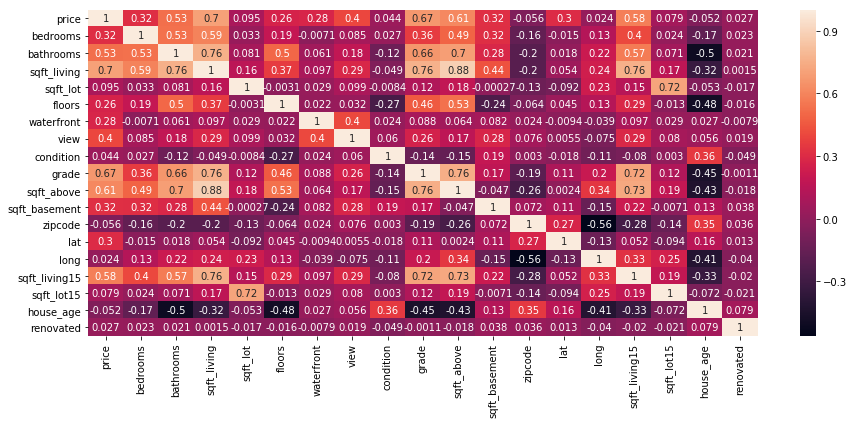

In [14]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
corr_matrix = house_train_data.corr()
sns.heatmap(data=corr_matrix, annot=True)
plt.show()
pylab.rcParams['figure.figsize'] = (10, 6)

It was expected that 'sqft_living' will be highly correlated to 'sqft_above' as sqft_above is equal to sqft_livng - sqft_basement

#### Continuos Variable

Let us check relations of each variable with price. We will start with continuous variables. The best way to check the relation between continous variables will be to plot a scatterplot with a regression line to show the linear relation.

In [15]:
house_train_data['sqft_lot_log'] = np.log(house_train_data.sqft_lot+1)
house_valid_data['sqft_lot_log'] = np.log(house_valid_data.sqft_lot+1)
house_test_data['sqft_lot_log'] = np.log(house_test_data.sqft_lot+1)
house_train_data['sqft_above_log'] = np.log(house_train_data.sqft_above+1)
house_valid_data['sqft_above_log'] = np.log(house_valid_data.sqft_above+1)
house_test_data['sqft_above_log'] = np.log(house_test_data.sqft_above+1)
house_train_data['sqft_basement_log'] = np.log(house_train_data.sqft_basement+1)
house_valid_data['sqft_basement_log'] = np.log(house_valid_data.sqft_basement+1)
house_test_data['sqft_basement_log'] = np.log(house_test_data.sqft_basement+1)
house_train_data['sqft_living15_log'] = np.log(house_train_data.sqft_living15+1)
house_valid_data['sqft_living15_log'] = np.log(house_valid_data.sqft_living15+1)
house_test_data['sqft_living15_log'] = np.log(house_test_data.sqft_living15+1)
house_train_data['sqft_lot15_log'] = np.log(house_train_data.sqft_lot15+1)
house_valid_data['sqft_lot15_log'] = np.log(house_valid_data.sqft_lot15+1)
house_test_data['sqft_lot15_log'] = np.log(house_test_data.sqft_lot15+1)
house_train_data['sqft_living_log'] = np.log(house_train_data.sqft_living+1)
house_valid_data['sqft_living_log'] = np.log(house_valid_data.sqft_living+1)
house_test_data['sqft_living_log'] = np.log(house_test_data.sqft_living+1)
house_train_data['price_log'] = np.log(house_train_data.price+1)
house_valid_data['price_log'] = np.log(house_valid_data.price+1)
house_test_data['price_log'] = np.log(house_test_data.price+1)

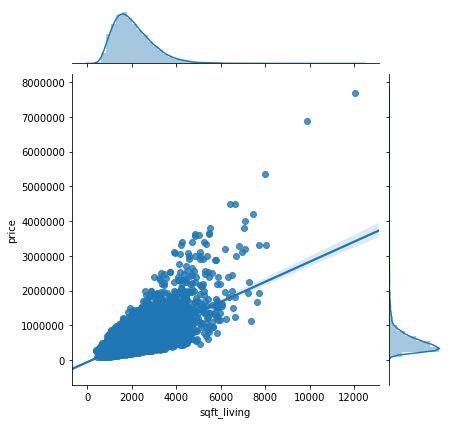

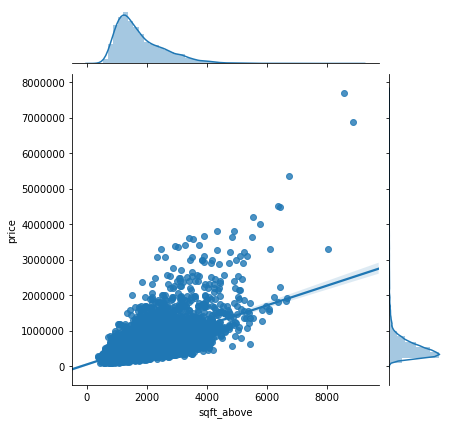

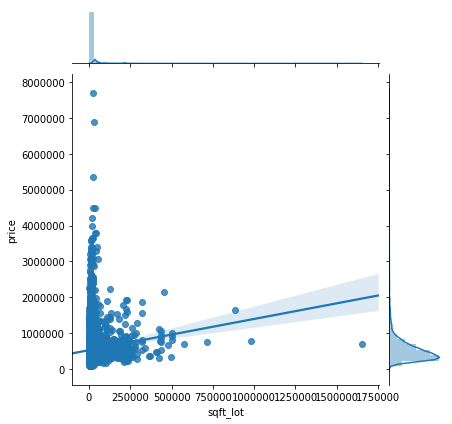

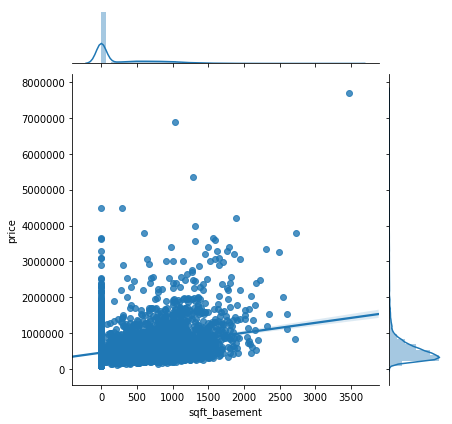

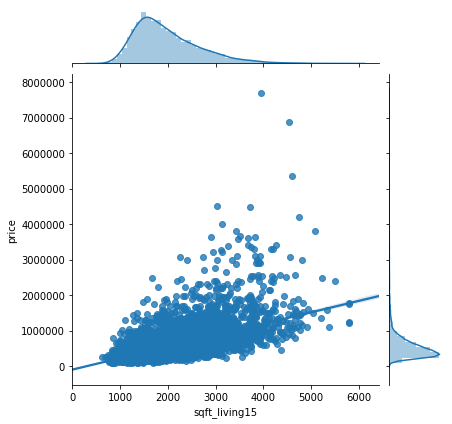

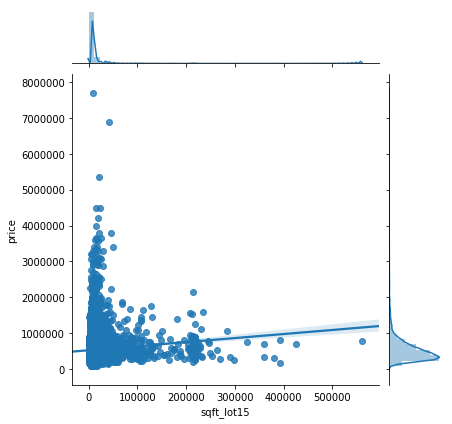

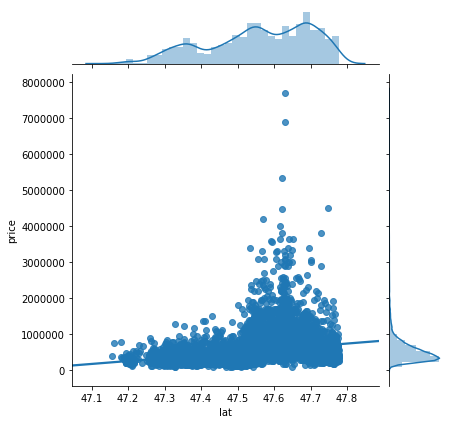

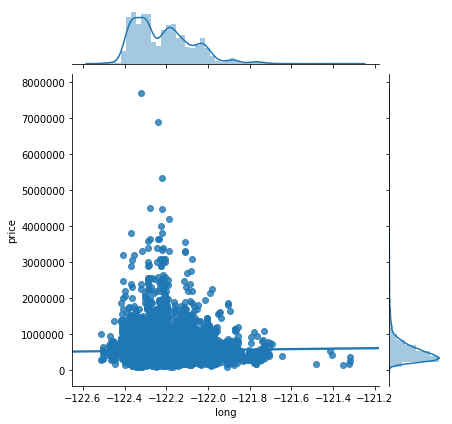

In [16]:
sns.jointplot(x="sqft_living", y="price", data=house_train_data, kind = 'reg')
sns.jointplot(x="sqft_above", y="price", data=house_train_data, kind = 'reg')
sns.jointplot(x="sqft_lot", y="price", data=house_train_data, kind = 'reg')
sns.jointplot(x="sqft_basement", y="price", data=house_train_data, kind = 'reg')
sns.jointplot(x="sqft_living15", y="price", data=house_train_data, kind = 'reg')
sns.jointplot(x="sqft_lot15", y="price", data=house_train_data, kind = 'reg')
sns.jointplot(x="lat", y="price", data=house_train_data, kind = 'reg')
sns.jointplot(x="long", y="price", data=house_train_data, kind = 'reg')
plt.show()

#### Discreet and Categorical Variables

We will start by plotting the boxplots of price by discreet and categorical variables to observe how close their distribution is. If a categorical variable has high impact on price, the boxplot's median and overall distribution will be easily distinguishable.

In [17]:
house_train_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,house_age,renovated,sqft_lot_log,sqft_above_log,sqft_basement_log,sqft_living15_log,sqft_lot15_log,sqft_living_log,price_log
count,9.754000e+03,9754.000000,9754.000000,9754.000000,9.754000e+03,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,...,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000
mean,5.428004e+05,3.374923,2.118336,2087.060488,1.519675e+04,1.486108,0.008407,0.248206,3.415932,7.662600,...,12802.391429,43.521632,0.007279,8.999308,7.397506,2.527250,7.542904,8.972610,7.553195,13.048859
std,3.795229e+05,0.909180,0.772844,926.577960,4.123205e+04,0.532341,0.091307,0.788132,0.649915,1.179154,...,26439.763544,29.243951,0.085011,0.892795,0.429126,3.175435,0.327121,0.801676,0.427259,0.531509
min,8.000000e+04,1.000000,0.750000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,...,660.000000,-1.000000,0.000000,6.255750,5.916202,0.000000,6.431331,6.493754,5.916202,11.289794
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,5160.000000,18.000000,0.000000,8.537192,7.082549,0.000000,7.307202,8.548886,7.259116,12.676079
50%,4.500000e+05,3.000000,2.250000,1917.000000,7.641500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,7660.000000,40.000000,0.000000,8.941480,7.359468,0.000000,7.518064,8.943898,7.559037,13.017005
75%,6.490000e+05,4.000000,2.500000,2570.000000,1.065000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,10111.000000,63.000000,0.000000,9.273409,7.710205,6.347389,7.771067,9.221478,7.852050,13.383190
max,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,560617.000000,115.000000,1.000000,14.317110,9.089415,8.155075,8.664060,13.236795,9.396903,15.856731


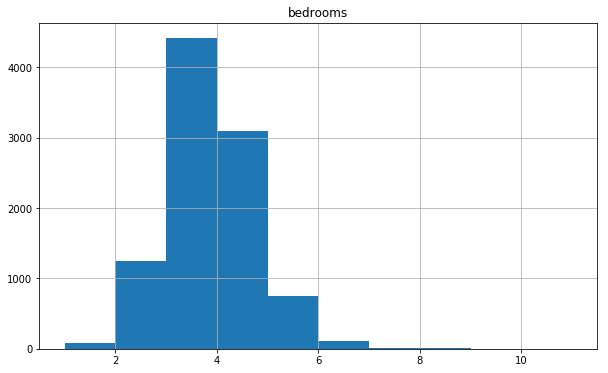

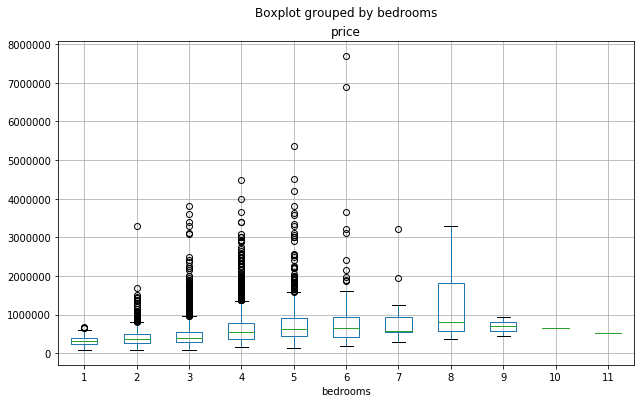

In [18]:
house_train_data.hist(column='bedrooms')
house_train_data.boxplot(column='price', by='bedrooms')
plt.show()

It looks like the number of bedrooms is related to the price of the house. As the number of bedrooms increases, the price distribution seems to take higher values as well. It doesn't look like they have a strong impact on each other though as even though the price increases with increase in number of bedrooms, the increase is not that drastic.

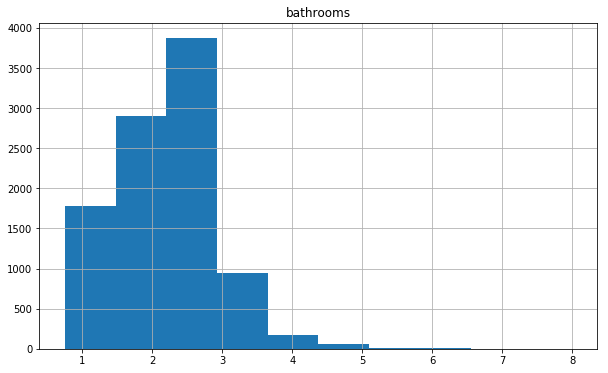

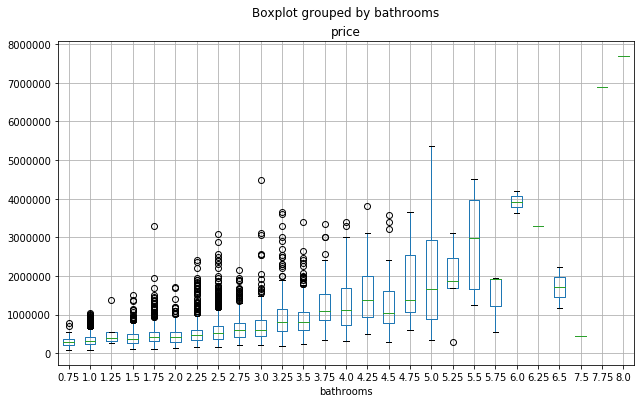

In [19]:
house_train_data.hist(column='bathrooms')
house_train_data.boxplot(column='price', by='bathrooms')
plt.show()

Price seems to related to the number of bathrooms present in the house as well and their relation looks stronger. We can clearly see a shift in price distribution as the number of bathroom increases.

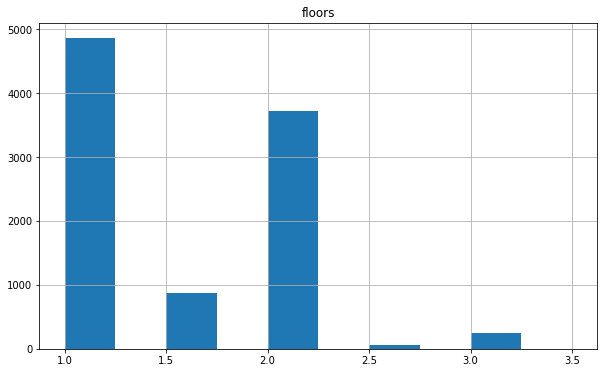

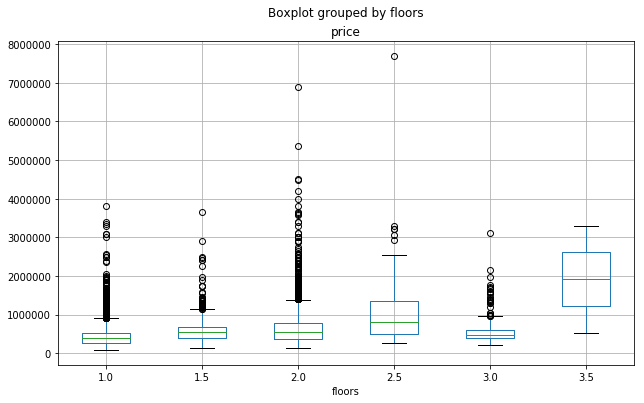

In [20]:
house_train_data.hist(column='floors')
house_train_data.boxplot(column='price', by='floors')
plt.show()

No of floors doesn't look like it has a strong relation with the price of the house.

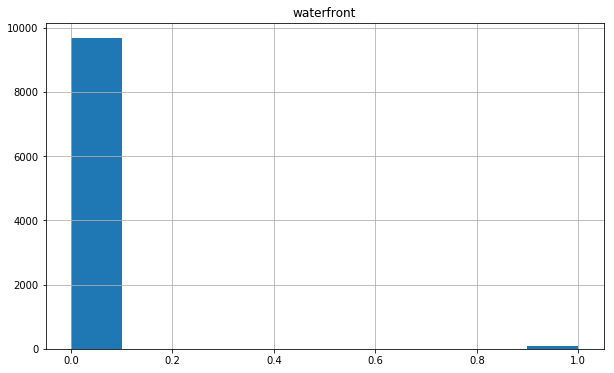

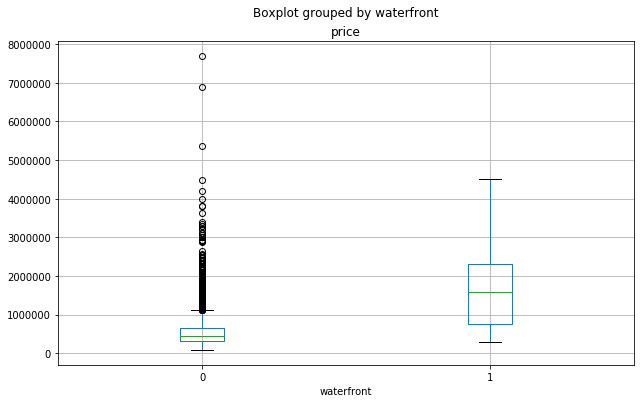

In [21]:
house_train_data.hist(column='waterfront')
house_train_data.boxplot(column='price', by='waterfront')
plt.show()

Presence of waterfall has a strong relation with the price distribution of the house.

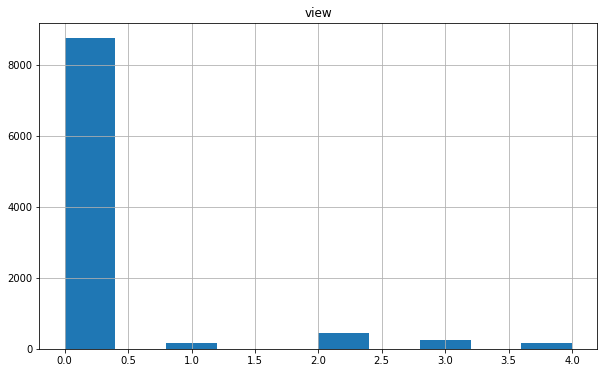

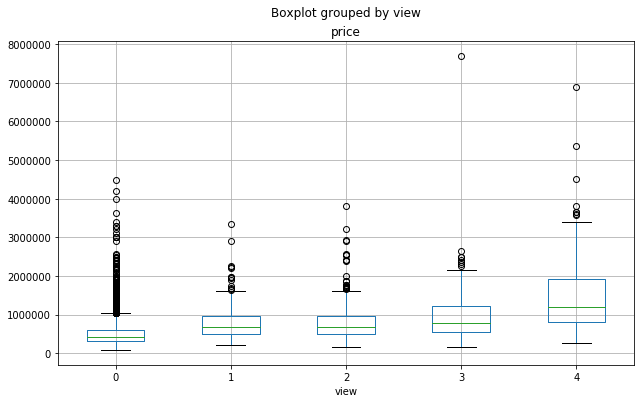

In [22]:
house_train_data.hist(column='view')
house_train_data.boxplot(column='price', by='view')
plt.show()

Most of the houses do not have a view but as the view gets better, we can observe the price distribution also keeps on getting better. View has a strong relation with the price distribution.

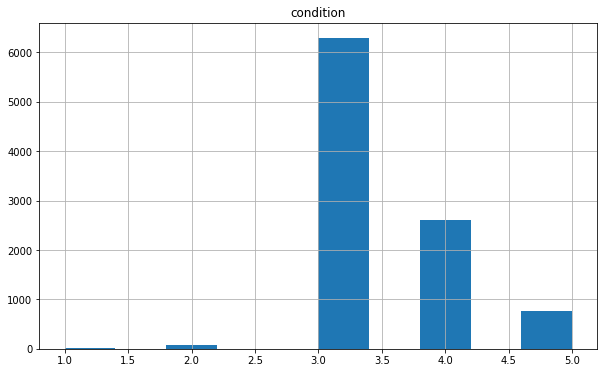

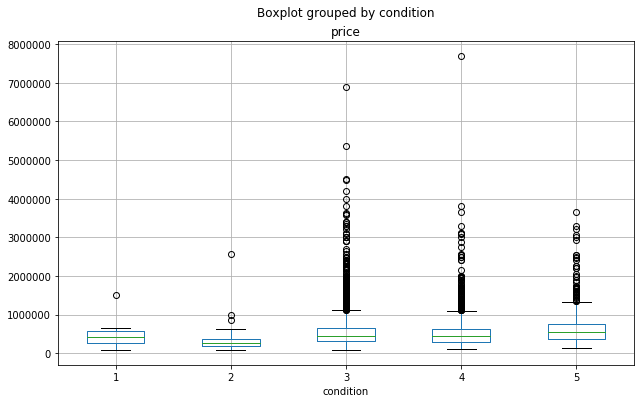

In [23]:
house_train_data.hist(column='condition')
house_train_data.boxplot(column='price', by='condition')
plt.show()

Most of the houses are in average condition but there is some relation of the price distribution with the price of the house.

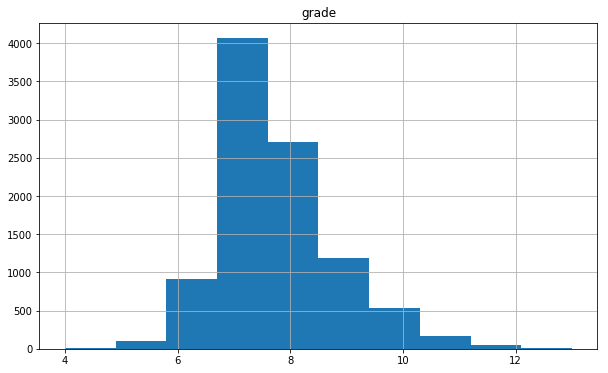

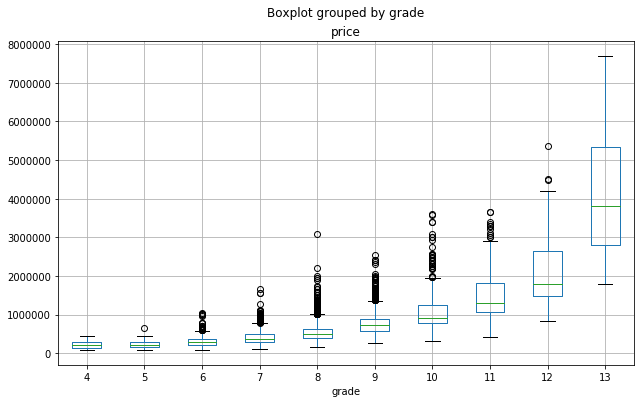

In [24]:
house_train_data.hist(column='grade')
house_train_data.boxplot(column='price', by='grade')
plt.show()

Most of the houses lie in grade 7. Looking at the boxplot, we can clearly see that grade has a very strong relationship with price.

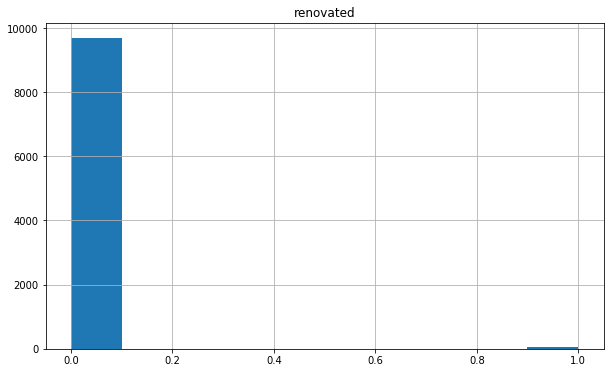

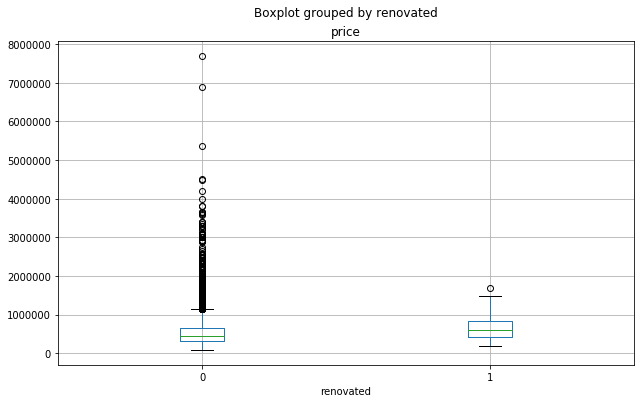

In [25]:
house_train_data.hist(column='renovated')
house_train_data.boxplot(column='price', by='renovated')
plt.show()

Most of the houses haven't been renovated recently but it looks like there is some relation of price with whether the house has been recently renovated or not.

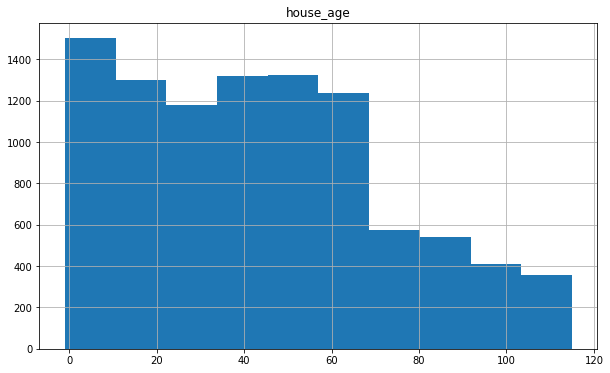

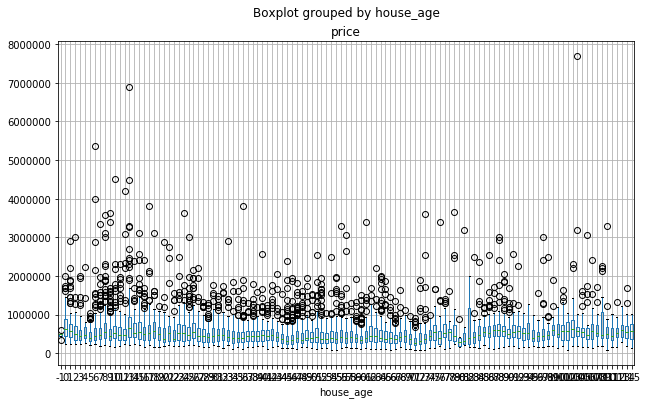

In [26]:
house_train_data.hist(column='house_age')
house_train_data.boxplot(column='price', by='house_age')
plt.show()

Most of the houses have been constructed recently but there hardly seems to be any relation of price with the age of the house.

All of them seems to be related to price exept 'floors' and 'house_age'. Out of all these variables, 'grade' seems to be the best indicator to guess the price. As the grade increases, the price distribution also seems to move higher.

#### Conclusion
In this section, we compared the association of every variable with the output and came to the conclusion that:
- 'sqft_living', 'sqft_above' and 'sqft_living15' are highly associated to price with pearson's correlation of 0.70, 0.60 and 0.58 respectively. 
- 'sqft_lot', 'long' and 'sqft_lot15' poorly associated with price.
- 'bedrooms', 'bathrooms', 'waterfront', 'view', 'grade' and 'renovated' seems to be moderately to strongly related price according to the graphs.

## Model Building - Price Predictions

To decide which model works best for the price prediction, I will use multiple models using the provided dataset and compare their results.
Models I will use to predict price:
- Simple Linear Regression
- Multivariate Linear Regression

Before we start fitting the model, we need to create dummy variables for dummy variables as regression models cannot understand categorical variables as it is.

In [28]:
c_cols = ['floors', 'view', 'condition', 'grade', 'zipcode']
    
for c in c_cols:
    dum = pd.get_dummies(data=house_train_data[c], drop_first=True, prefix=c)
    house_train_data.drop(c, axis=1, inplace=True)
    house_train_data = house_train_data.join(dum)

In [29]:
c_colums = ['view','zipcode','condition', 'grade','floors']
    
for c in c_colums:
    dum = pd.get_dummies(data=house_test_data[c], drop_first=True, prefix=c)
    house_test_data.drop(c, axis=1, inplace=True)
    house_test_data = house_test_data.join(dum)

In [30]:
c_colums = ['view','zipcode','condition', 'grade','floors']
    
for c in c_colums:
    dum = pd.get_dummies(data=house_valid_data[c], drop_first=True, prefix=c)
    house_valid_data.drop(c, axis=1, inplace=True)
    house_valid_data = house_valid_data.join(dum)

#### Simple Linear Regression
I will be fitting 'sqft_living' vs 'price' model as sqft_living gave us the correlation of 0.7 which is highest among all the variables.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
def simple_rm(train, test, input_feature, graph = False):
    regr = LinearRegression()
    
    x_train = train[input_feature].values.reshape(-1, 1)
    y_train = train['price'].values.reshape(-1, 1)
    x_test = test[input_feature].values.reshape(-1, 1)
    y_test = test['price'].values.reshape(-1, 1)
    
    regr.fit(x_train, y_train)
    
    y_pred = regr.predict(x_test)
    
    RMSE = mean_squared_error(y_test, y_pred)**0.5
    r_sq = r2_score(y_test, y_pred)
    
    if graph:
        plt.scatter(x_test, y_test,  color='gray')
        plt.plot(x_test, y_pred, color='red', linewidth=2)
        plt.show()

    return RMSE, r_sq, regr.intercept_[0], regr.coef_[0][0]

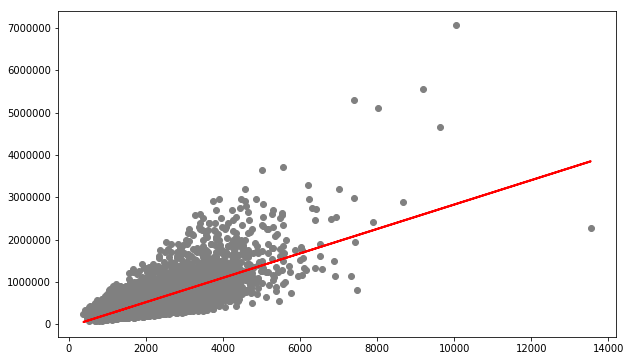

RMSE for sqft_living is 255584.22668562896
R Square for sqft_living is 0.4851292410105207
Intercept: -59796.421865343116
Coefficient: 288.72993224184785


In [33]:
RMSE, r_sq, intercept, coeff = simple_rm(house_train_data, house_valid_data, ['sqft_living'], True)
print('RMSE for sqft_living is %s' %RMSE)
print('R Square for sqft_living is %s' %r_sq)
print('Intercept: %s' %intercept)
print('Coefficient: %s' %coeff)

##### Simple Linear Regression with Log of sqft_living

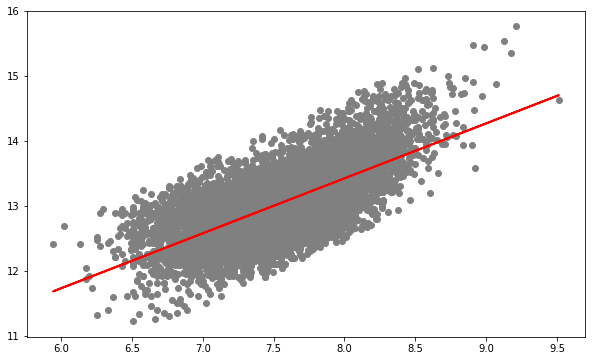

In [34]:
regr = LinearRegression()
    
x_train = house_train_data['sqft_living_log'].values.reshape(-1, 1)
y_train = house_train_data['price_log'].values.reshape(-1, 1)
x_test =house_valid_data['sqft_living_log'].values.reshape(-1, 1)
y_test = house_valid_data['price'].values.reshape(-1, 1)

regr.fit(x_train, y_train)

y_pred = np.exp(regr.predict(x_test))

RMSE = mean_squared_error(y_test, y_pred)**0.5
r_square = r2_score(y_test, y_pred)

plt.scatter(x_test, np.log(y_test),  color='gray')
plt.plot(x_test, np.log(y_pred), color='red', linewidth=2)
plt.show()

In [35]:
print('RMSE for sqft_living_square is %s' %RMSE)
print('R Square for sqft_living_square is %s' %r_square)

RMSE for sqft_living_square is 270023.0773628686
R Square for sqft_living_square is 0.42531230705452217


##### Simple Linear Regression Results:

- Simple Linear Regression: price vs sqft_living
    - RMSE: 255584.22668562896
    - R Square: 0.4851292410105207
    
- Simple Linear Regression: price_log vs sqft_living_log
    - RMSE: 270041.5183861738
    - R Square: 0.425233808645218
    
We tried to experiment with the variables by squaring, taking log of sqft_living hoping that it would increase the R Square value and decrease the RMSE value for the model. RMSE value went down when we tried to increase the magnitude of sqft_living by squaring it but it went up again when we took log of the features.

In [44]:
def multiple_lm_log(train, test, input_feature):
    regr = LinearRegression()
    
    x_train = np.array(train[input_feature])
    y_train = train['price_log'].values.reshape(-1, 1)
    x_test = np.array(test[input_feature])
    y_test = test['price'].values.reshape(-1, 1)
    
    regr.fit(x_train, y_train)
    
    y_pred = np.exp(regr.predict(x_test))
    
    RMSE = mean_squared_error(y_test, y_pred)**0.5
    r_square = r2_score(y_test, y_pred)

    return RMSE, r_square, regr.intercept_[0], regr.coef_[0], input_feature

In [45]:
all_cols = house_train_data.columns.tolist()

In [47]:
RMSE, r_square, intercept, coeff, feature = multiple_linear_model_log(house_train_data,house_valid_data, all_cols)
print('RMSE for sqft_living is %s' %RMSE)
print('R Square simple linear regression without log transformation sqft_living is %s' %r_square)
print('Features:', feature)

RMSE for sqft_living is 121287.08270423203
R Square simple linear regression without log transformation sqft_living is 0.8840530758452675
Features: ['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_age', 'renovated', 'sqft_lot_log', 'sqft_above_log', 'sqft_basement_log', 'sqft_living15_log', 'sqft_lot15_log', 'sqft_living_log', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipc

In [48]:
all_cols.remove('sqft_basement_log')
RMSE, r_square, intercept, coeff, feature = multiple_linear_model_log(house_train_data,house_valid_data, all_cols)
print('RMSE for sqft_living is %s' %RMSE)
print('R Square simple linear regression without log transformation sqft_living is %s' %r_square)
print('Features:', feature)

RMSE for sqft_living is 121907.19368535795
R Square simple linear regression without log transformation sqft_living is 0.8828644288321715
Features: ['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_age', 'renovated', 'sqft_lot_log', 'sqft_above_log', 'sqft_living15_log', 'sqft_lot15_log', 'sqft_living_log', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_

In [49]:
all_cols.remove('sqft_living15_log')
RMSE, r_square, intercept, coeff, feature = multiple_linear_model_log(house_train_data,house_valid_data, all_cols)
print('RMSE for sqft_living is %s' %RMSE)
print('R Square simple linear regression without log transformation sqft_living is %s' %r_square)
print('Features:', feature)

RMSE for sqft_living is 121345.38916745198
R Square simple linear regression without log transformation sqft_living is 0.8839415704829789
Features: ['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_age', 'renovated', 'sqft_lot_log', 'sqft_above_log', 'sqft_lot15_log', 'sqft_living_log', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_9803

In [51]:
all_cols.remove('lat')
RMSE, r_square, intercept, coeff, feature = multiple_linear_model_log(house_train_data,house_valid_data, all_cols)
print('RMSE for sqft_living is %s' %RMSE)
print('R Square simple linear regression without log transformation sqft_living is %s' %r_square)
print('Features:', feature)

RMSE for sqft_living is 122015.26857682495
R Square simple linear regression without log transformation sqft_living is 0.8826566474000911
Features: ['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age', 'renovated', 'sqft_lot_log', 'sqft_above_log', 'sqft_lot15_log', 'sqft_living_log', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98

In [50]:
all_cols.remove('long')
RMSE, r_square, intercept, coeff, feature = multiple_linear_model_log(house_train_data,house_valid_data, all_cols)
print('RMSE for sqft_living is %s' %RMSE)
print('R Square simple linear regression without log transformation sqft_living is %s' %r_square)
print('Features:', feature)

RMSE for sqft_living is 121650.4765706824
R Square simple linear regression without log transformation sqft_living is 0.8833572470636759
Features: ['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'sqft_lot15', 'house_age', 'renovated', 'sqft_lot_log', 'sqft_above_log', 'sqft_lot15_log', 'sqft_living_log', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipc